# Introduction to Seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


**Numerical Plots**

**Distribution**: Histogram, KDE (Kernel Density Estimate), Displot

**Bar Plot**

**Count Plot**

**Box Plot**: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng

**Facet Plot**: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.

**Join Plot**

**Pair Plot**

**Heat Map**: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

#Distribution Plot
Univariate distribution of observations

In [ ]:
tips_df = sns.load_dataset('tips')

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


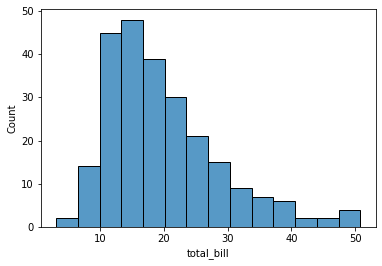

In [ ]:
sns.histplot(data = tips_df['total_bill']);

In [ ]:
tips_df['total_bill'].value_counts().sort_values(ascending = False)

13.42    3
15.69    2
10.34    2
10.07    2
20.69    2
        ..
40.17    1
48.27    1
22.12    1
13.27    1
10.51    1
Name: total_bill, Length: 229, dtype: int64

# KDE plot
*   A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.
*   KDE represents the data using a continuous probability density curve in one or more dimensions



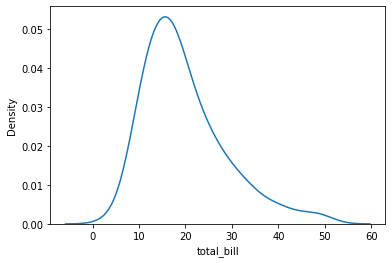

In [ ]:
sns.kdeplot(data = tips_df['total_bill']);

**Displot**

*   Informative distributional summaries
*   Statistical analyses require knowledge about the distribution of variables in your dataset.
*   The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation

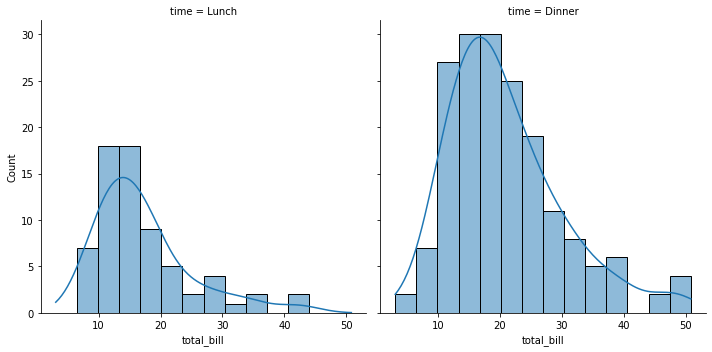

In [ ]:
sns.displot(data = tips_df, x = "total_bill",col = "time",kde = True);

# Categorical Plots

Bar Plots

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


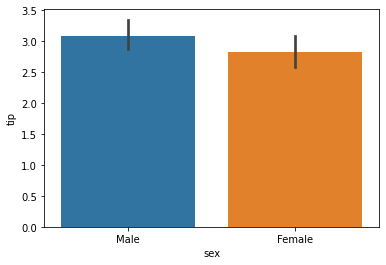

In [ ]:
sns.barplot(data =tips_df ,x = 'sex', y= 'tip', estimator= np.mean);


# Count Plot

In [ ]:
tips_df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

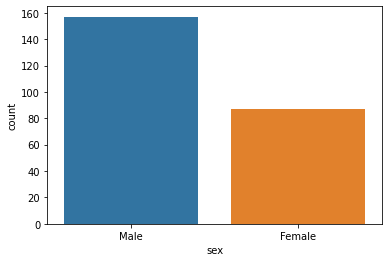

In [ ]:
sns.countplot(data = tips_df,x="sex")

#**Box Plot**
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped
Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


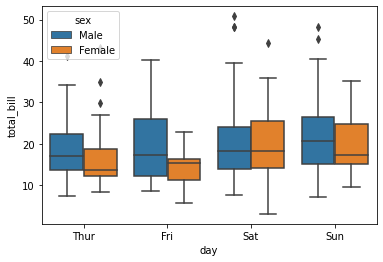

In [ ]:
sns.boxplot(data = tips_df,x="day", y = "total_bill",hue = "sex");

#**Facet Grid**
* FacetGrid can be drawn with up to three dimensions: row, col, and hue.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method.

In [ ]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


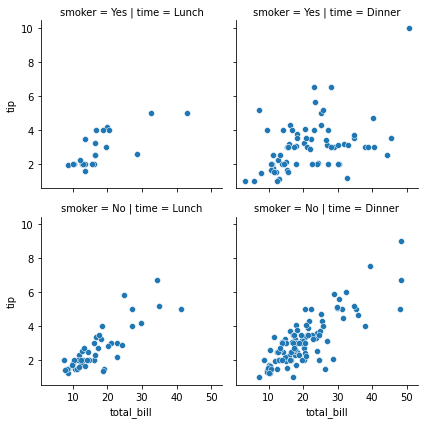

In [ ]:
tips_fg = sns.FacetGrid(data = tips_df, row = "smoker", col = "time") #Create a class instance of Facet Grid class
tips_fg.map(sns.scatterplot,'total_bill','tip');

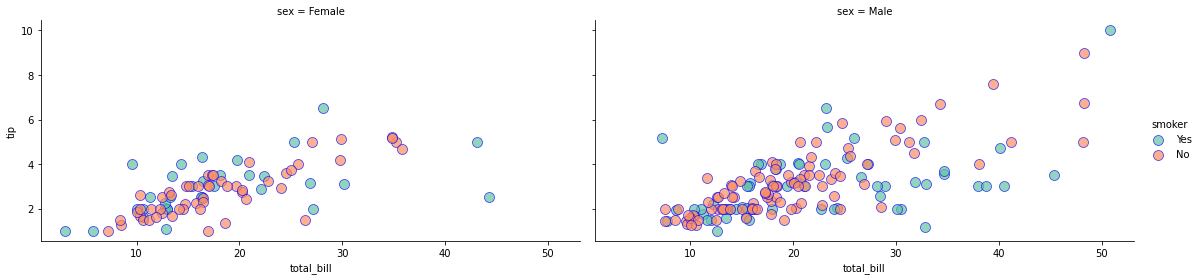

In [ ]:

new_fg = sns.FacetGrid(data = tips_df, col = 'sex',
                       hue = "smoker",
                       col_order = ['Female','Male'],
                       palette = 'Set2',
                       height = 4, aspect = 2)
new_fg.map(sns.scatterplot,'total_bill', 'tip', s= 100, edgecolor = 'b',alpha = .7)
new_fg.add_legend();

#**Joint Plot**
* joint distribution between two variables along with each variable’s marginal distribution

In [ ]:
penguins_df = sns.load_dataset('penguins')

In [ ]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
